https://huggingface.co/docs/transformers/main/en/quicktour

NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.

The following is a list of common NLP tasks, with some examples of each:

Classifying whole sentences: Getting the sentiment of a review, detecting if an email is spam, determining if a sentence is grammatically correct or whether two sentences are logically related or not
Classifying each word in a sentence: Identifying the grammatical components of a sentence (noun, verb, adjective), or the named entities (person, location, organization)
Generating text content: Completing a prompt with auto-generated text, filling in the blanks in a text with masked words
Extracting an answer from a text: Given a question and a context, extracting the answer to the question based on the information provided in the context
Generating a new sentence from an input text: Translating a text into another language, summarizing a text
NLP isn’t limited to written text though. It also tackles complex challenges in speech recognition and computer vision, such as generating a transcript of an audio sample or a description of an image.

#**Why Hugging Face**?
Access thousands of pre-trained Transformer models for tasks like text classification, summarization, translation, and more.
Examples: BERT, GPT-2, GPT-3, T5, DistilBERT, ViT.

https://huggingface.co/models

https://github.com/huggingface/transformers

#**Tokenizers**
Translate text into data that can be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data.

1. **word-based tokenizer**: goal is to split the raw text into words and find a numerical representation for each of them
</br>**Drawbacks**:</br>

    - With this kind of tokenizer, we can end up with some pretty **large “vocabularies,”** where a vocabulary is defined by the total number of independent tokens that we have in our corpus.
    For example, there are over 500,000 words in the English language, so to build a map from each word to an input ID we’d need to keep track of that many IDs. Furthermore, words like “dog” are represented differently from words like “dogs”, and the model will initially have no way of knowing that “dog” and “dogs” are similar: it will identify the two words as unrelated. The same applies to other similar words, like “run” and “running”, which the model will not see as being similar initially.
    - Finally, we need a custom token to represent words that are not in our vocabulary. This is known as the **“unknown” token**, often represented as ”[UNK]” or ”<unk>”. It’s generally a bad sign if you see that the tokenizer is producing a lot of these tokens, as it wasn’t able to retrieve a sensible representation of a word and you’re losing information along the way. The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token.
2. **Character-based**: Character-based tokenizers split the text into characters, rather than words. This has two primary benefits:

  - The vocabulary is much smaller.
  - There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.
  - Issues: each character doesn’t mean a lot on its own, whereas that is the case with words
  - we’ll end up with a very large amount of tokens to be processed by our model: whereas a word would only be a single token with a word-based tokenizer, it can easily turn into 10 or more tokens when converted into characters.
  - To get the best of both worlds, we can use a third technique that combines the two approaches: subword tokenization.



3. **Subword tokenization**:
- Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.
- For instance, “annoyingly” might be considered a rare word and could be decomposed into “annoying” and “ly”. These are both likely to appear more frequently as standalone subwords, while at the same time the meaning of “annoyingly” is kept by the composite meaning of “annoying” and “ly”.



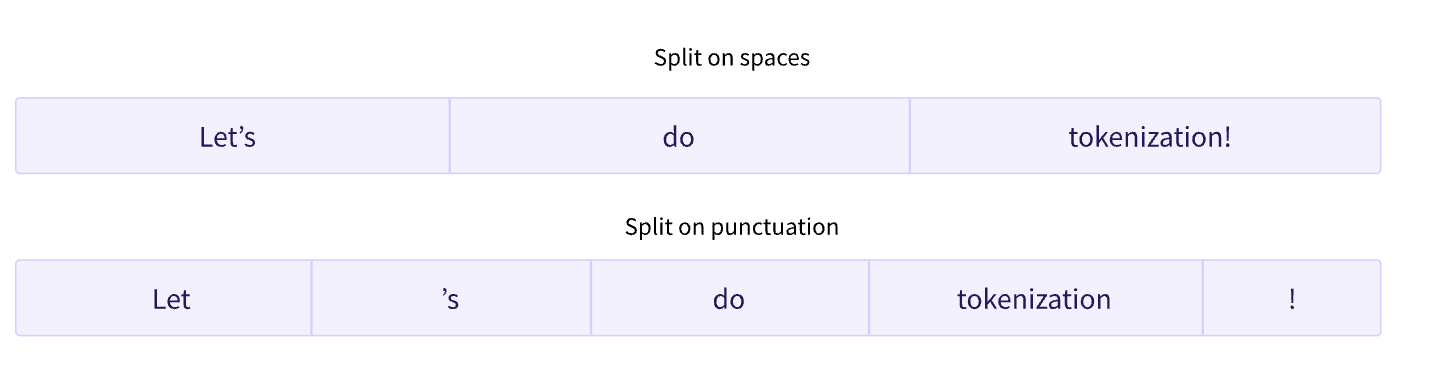

**subword tokenization**

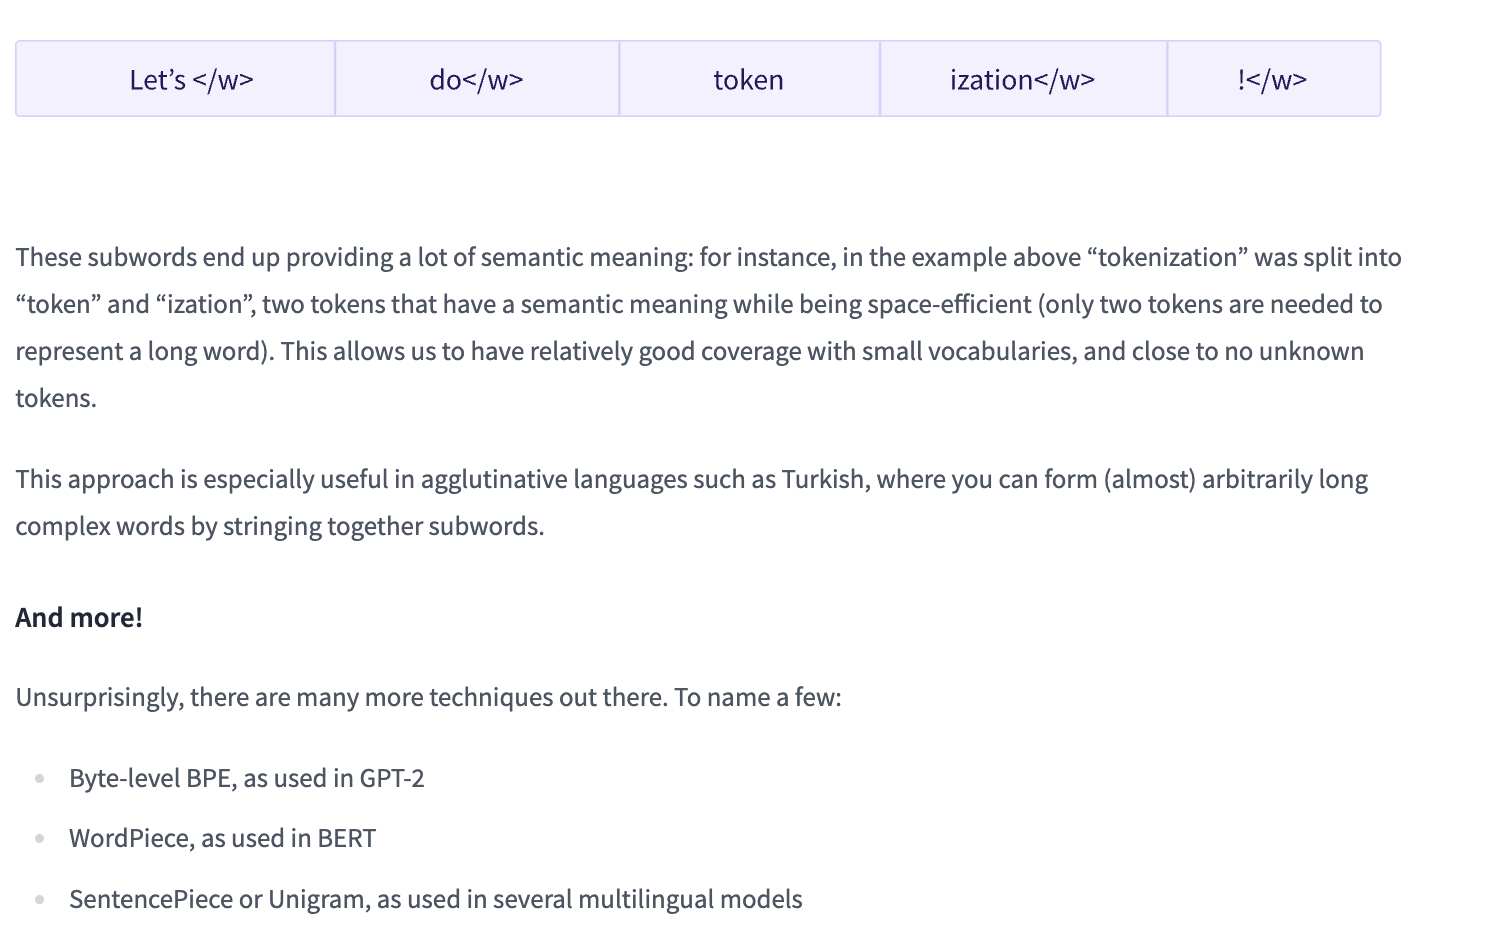

#1. **Tokenization**

In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
sequence = "Using a Transformer network is simple"
tokens= tokenizer.tokenize(sequence)
tokens

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']

In [2]:
# tokenizer.save_pretrained('dir')

#**2. Encoding**
  - Translating text to numbers is known as encoding. Encoding is done in a two-step process: the tokenization, followed by the conversion to input IDs.
  - Imp- **The second step is to convert those tokens into numbers, so we can build a tensor out of them and feed them to the model. To do this, the tokenizer has a vocabulary, which is the part we download when we instantiate it with the from_pretrained() method. Again, we need to use the same vocabulary used when the model was pretrained**.
- tokenizer--> tokenize followed by convert_to_ids methods

In [2]:
# using the previous exmple
ids= tokenizer.convert_tokens_to_ids(tokens)
ids

[7993, 170, 13809, 23763, 2443, 1110, 3014]

In [3]:
# decoding
# Note that the decode method not only converts the indices back to tokens, but also groups together the tokens that were part of the same words
# to produce a readable sentence. This behavior will be extremely useful when we use models that predict new text (either text generated from a prompt, or for sequence-to-sequence problems like translation or summarization).
tokenizer.decode([7993, 170, 13809, 23763, 2443, 1110, 3014])

'Using a Transformer network is simple'

## **2.2 Handling multiple sentences**

  - How do we handle multiple sequences: passing data in batches
  - How do we handle multiple sequences of different lengths: using padding
  - Is there such a thing as too long a sequence: If a sequence is longer than the model's maximum input length, it truncates the sequence

**a. Models expect a batch of inputs**

In [9]:
# find the problem with the below code
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
tokenizer= AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
seq = 'this is hands on tutorial on HuggingFace'

In [16]:
tokens= tokenizer.tokenize(seq)
print(tokens)
ids= tokenizer.convert_tokens_to_ids(tokens)
print(ids)
# input_ids= torch.tensor([ids])
# error : model expects a batch of inputs: The problem is that we sent a single sequence to the model, whereas Transformers models expect multiple sentences by default.
input_ids= torch.tensor([ids])
print(input_ids)
output = model(input_ids)
print("Logits:", output.logits)

['this', 'is', 'hands', 'on', 'tutor', '##ial', 'on', 'hugging', '##face']
[2023, 2003, 2398, 2006, 14924, 4818, 2006, 17662, 12172]
tensor([[ 2023,  2003,  2398,  2006, 14924,  4818,  2006, 17662, 12172]])
Logits: tensor([[ 1.1447, -1.0116]], grad_fn=<AddmmBackward0>)


In [14]:
# This is shorter version: passing parameters in tokenizer
#using return_tensor= "pt": tokenizer didn’t just convert the list of input IDs into a tensor, it added a dimension on top of it
tokenized_inputs = tokenizer(seq, return_tensors= 'pt')
print(tokenized_inputs["input_ids"])
output = model(input_ids)
print("Logits:", output.logits)

tensor([[  101,  2023,  2003,  2398,  2006, 14924,  4818,  2006, 17662, 12172,
           102]])
Logits: tensor([[ 1.1447, -1.0116]], grad_fn=<AddmmBackward0>)


**b. Padding the inputs**

Attention mask also important to be provided to the model-

  - When you pad sequences to ensure they have the same length, the model needs to know which tokens are meaningful and which are padding.
  - Padding tokens are irrelevant to the sequence meaning, but without an attention mask, the model will process them as if they are valid tokens.

**c. handling Longer sequences**

With Transformer models, there is a limit to the lengths of the sequences we can pass the models. Most models handle sequences of up to 512 or 1024 tokens, and will crash when asked to process longer sequences. There are two solutions to this problem:

Use a model with a longer supported sequence length.
Truncate your sequences.
Models have different supported sequence lengths, and some specialize in handling very long sequences. Longformer is one example, and another is LED

In [31]:
# The output is not what we expected, the sentences are processed into one single sentence
seq = ['this is hands on tutorial on HuggingFace', 'the free version tutorial of tutorial is incomplete need to purchase the course I guess!']
tokens= tokenizer.tokenize(seq)
print(tokens)
ids= tokenizer.convert_tokens_to_ids(tokens)
print(ids)
# input_ids= torch.tensor([ids])
# error : model expects a batch of inputs: The problem is that we sent a single sequence to the model, whereas Transformers models expect multiple sentences by default.
input_ids= torch.tensor([ids])
print(input_ids)
output = model(input_ids)
print("Logits:", output.logits)

['this', 'is', 'hands', 'on', 'tutor', '##ial', 'on', 'hugging', '##face', 'the', 'free', 'version', 'tutor', '##ial', 'of', 'tutor', '##ial', 'is', 'incomplete', 'need', 'to', 'purchase', 'the', 'course', 'i', 'guess', '!']
[2023, 2003, 2398, 2006, 14924, 4818, 2006, 17662, 12172, 1996, 2489, 2544, 14924, 4818, 1997, 14924, 4818, 2003, 12958, 2342, 2000, 5309, 1996, 2607, 1045, 3984, 999]
tensor([[ 2023,  2003,  2398,  2006, 14924,  4818,  2006, 17662, 12172,  1996,
          2489,  2544, 14924,  4818,  1997, 14924,  4818,  2003, 12958,  2342,
          2000,  5309,  1996,  2607,  1045,  3984,   999]])
Logits: tensor([[ 2.7436, -2.3926]], grad_fn=<AddmmBackward0>)


##**Imp: Code to handle padding and truncation manually before passing the data and attention mask to the transformer based model**

In [42]:
# The below arrangement also does not work as the input to tokenize should be string
# seq = [['this is hands on tutorial on HuggingFace', 'the free version tutorial of tutorial is incomp lete, need to purchase the course I guess!']]
# Correct solution

max_length= 10
seq = ['this is hands on tutorial on HuggingFace', 'the free version tutorial of tutorial is incomplete need to purchase the course I guess!']
print(seq[0])
print(seq[1])

# solution:
tokens_seq1= tokenizer.tokenize(seq[0])[:max_length]
tokens_seq2= tokenizer.tokenize(seq[1])[:max_length]

print(tokens_seq1)
print(tokens_seq2)
ids_seq1= tokenizer.convert_tokens_to_ids(tokens_seq1)
ids_seq2= tokenizer.convert_tokens_to_ids(tokens_seq2)

print(ids_seq1)
print(ids_seq2)

# pad to max seq length
max_len= max(len(ids_seq1), len(ids_seq2))

# a= [10,20]
# a= a + [0] * 5
# a

ids_padded_seq1 = ids_seq1 + [tokenizer.pad_token_id] * (max_len - len(ids_seq1))
ids_padded_seq2 = ids_seq2 + [tokenizer.pad_token_id] * (max_len - len(ids_seq2))

print("After padding")
print(ids_seq1)
print(ids_seq2)

# convert to pytorch tensor
input_ids= torch.tensor([ids_padded_seq1, ids_padded_seq2])

# create attention masks manually
ids_mask1 = [1] * len(ids_seq1) + [0] * (max_len - len(ids_seq1))
ids_mask2 = [1] * len(ids_seq2) + [0] * (max_len - len(ids_seq2))

print("Attention masks")
print(ids_mask1)
print(ids_mask2)

# convert to pytorch tensors
attention_mask= torch.tensor([ids_mask1, ids_mask2])

output = model(input_ids, attention_mask = attention_mask)

print("Logits:", output.logits)


this is hands on tutorial on HuggingFace
the free version tutorial of tutorial is incomplete need to purchase the course I guess!
['this', 'is', 'hands', 'on', 'tutor', '##ial', 'on', 'hugging', '##face']
['the', 'free', 'version', 'tutor', '##ial', 'of', 'tutor', '##ial', 'is', 'incomplete']
[2023, 2003, 2398, 2006, 14924, 4818, 2006, 17662, 12172]
[1996, 2489, 2544, 14924, 4818, 1997, 14924, 4818, 2003, 12958]
After padding
[2023, 2003, 2398, 2006, 14924, 4818, 2006, 17662, 12172]
[1996, 2489, 2544, 14924, 4818, 1997, 14924, 4818, 2003, 12958]
Attention masks
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Logits: tensor([[ 1.1447, -1.0116],
        [ 4.0063, -3.2483]], grad_fn=<AddmmBackward0>)


## **Most commonly used practice**

The most commonly used practice when working with Transformer models like BERT, GPT, or similar architectures, is to rely on the tokenizer's built-in truncation and padding capabilities, rather than handling them manually. This ensures consistency and simplicity, while still adhering to the model's constraints.

Here’s what is typically done:


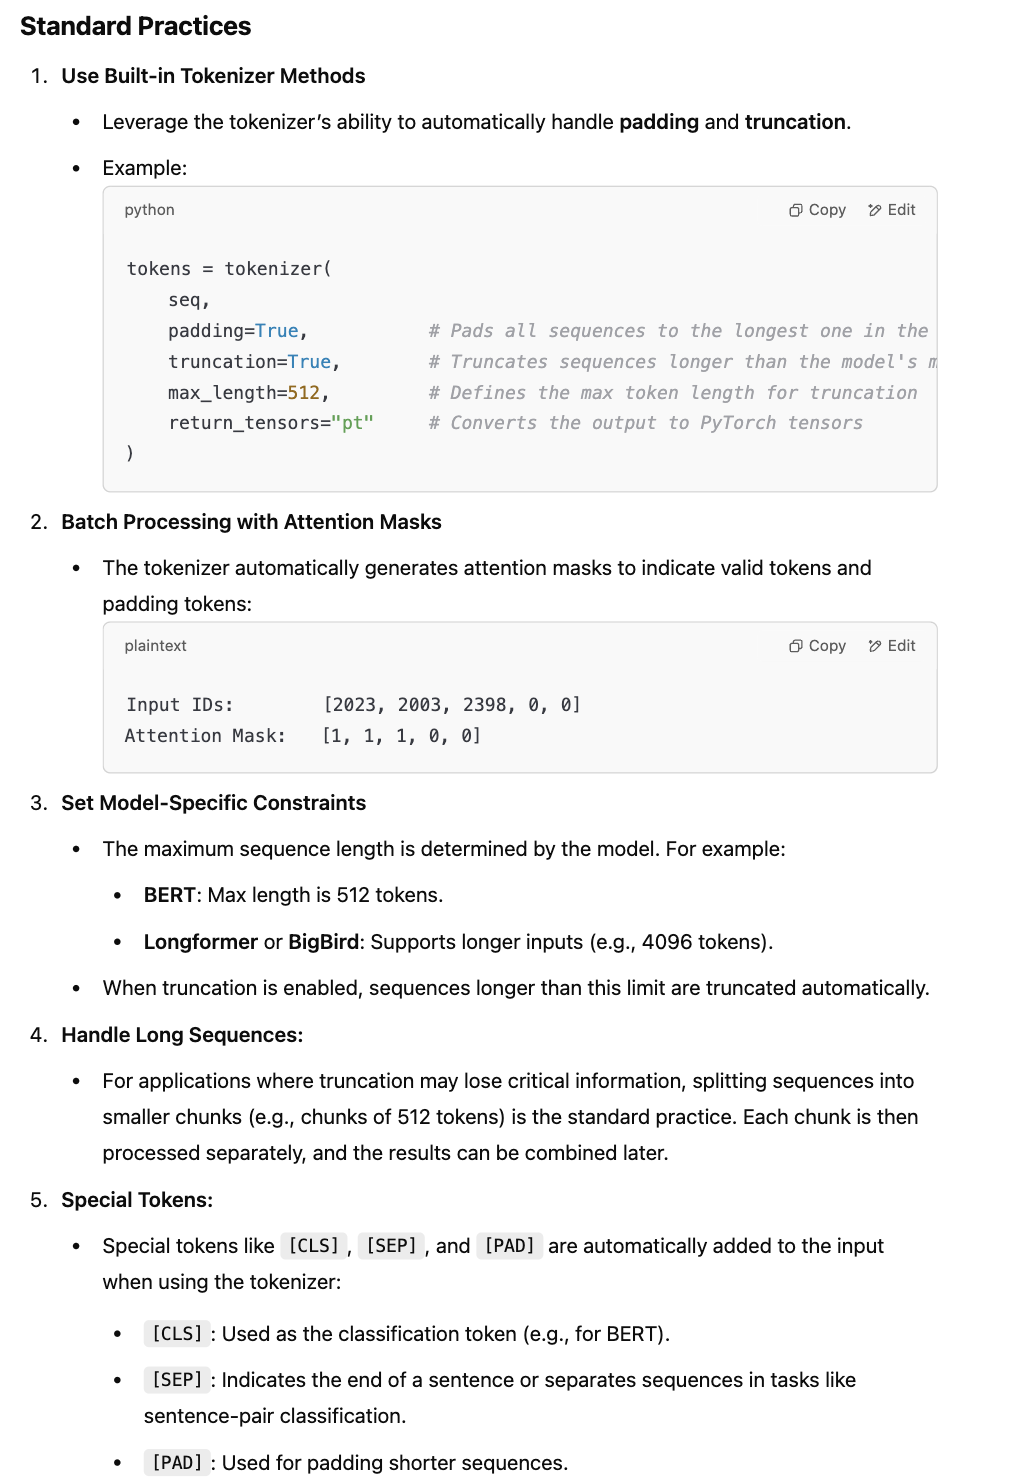

In [44]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")

# Input sequences
seq = [
    "this is hands on tutorial on HuggingFace",
    "the free version tutorial of tutorial is incomplete need to purchase the course I guess!"
]

tokens = tokenizer(
    seq,
    padding=True,           # Pads all sequences to the longest one in the batch
    truncation=True,        # Truncates sequences longer than the model's max length
    max_length=512,         # Defines the max token length for truncation
    return_tensors="pt"     # Converts the output to PyTorch tensors
)

# Extract input IDs and attention masks
input_ids= tokens['input_ids']
attention_mask= tokens['attention_mask']

output= model(input_ids, attention_mask= attention_mask)
output.logits

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[-0.1702, -0.3105],
        [-0.3081, -0.5139]], grad_fn=<AddmmBackward0>)

In [ ]:
#  Additional Handling for Long Sequences
# def split_into_chunks(sequence, tokenizer, max_length=512):
#     tokens = tokenizer.tokenize(sequence)
#     chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
#     return chunks


#**Quiz**

https://huggingface.co/learn/nlp-course/en/chapter2/8?fw=pt